# Hw4 Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw4 import *
from src.pca import PCA

%load_ext autoreload
%autoreload 2

In [2]:
# load date
X_train, y_train = load_data("train")
X_val, y_val = load_data("val")

In [3]:
# Train pca
pca = PCA(n_components=40)
pca.fit(X_train)
pca.components

array([[-0.00251804, -0.00202934, -0.0019007 , ...,  0.01042043,
         0.00970501,  0.00952482],
       [-0.00581508, -0.00549877, -0.00501899, ..., -0.01489392,
        -0.01421267, -0.0147486 ],
       [-0.00328324, -0.00348955, -0.00360748, ...,  0.00068049,
         0.00076611,  0.00179045],
       ...,
       [ 0.01437973,  0.01673194,  0.01529846, ..., -0.01356296,
        -0.00914527, -0.00976794],
       [-0.01058609, -0.01044993, -0.01005245, ..., -0.00516778,
        -0.01495942, -0.02190599],
       [ 0.00892173,  0.01136742,  0.01095737, ..., -0.00188989,
        -0.00220494, -0.00326373]], shape=(40, 4880))

## (a)

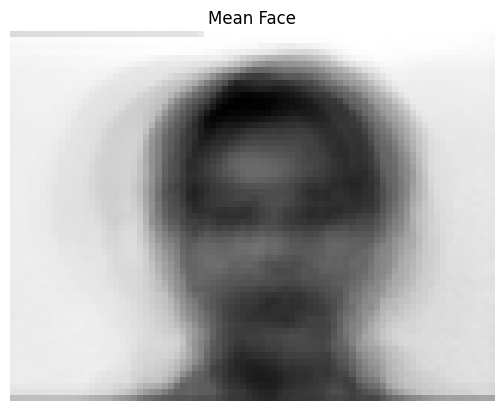

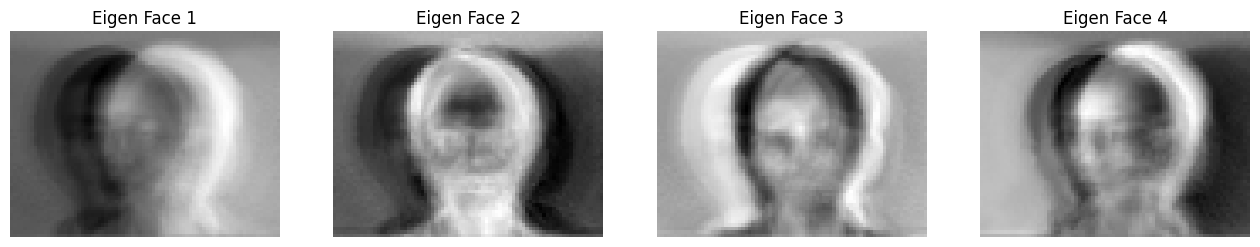

In [4]:
# (a) plot mean and eigen face

plt.imshow(pca.mean.reshape(61, 80), cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axes[i].imshow(pca.components[i].reshape(61, 80), cmap='gray')
    axes[i].set_title(f'Eigen Face {i+1}')
    axes[i].axis('off')

plt.show()

### (b) Training curve for Autoencoder and DenoisingAutoencoder

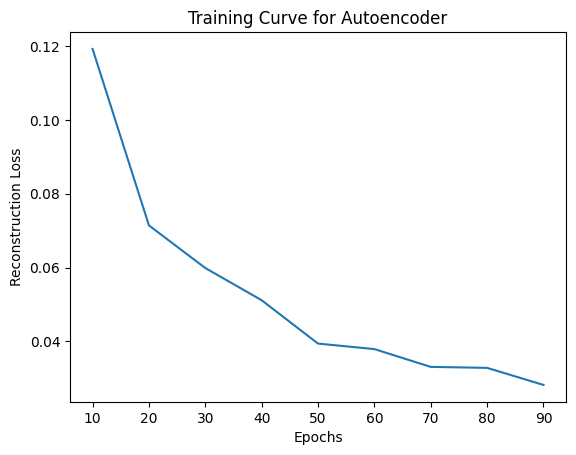

In [5]:
# (b) the training curve for the autoencoder

err_list = []
for epochs in range(10, 100, 10):
    autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

err = pd.Series(err_list, index=range(10, 100, 10))

plt.plot(err)
plt.title('Training Curve for Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.show()

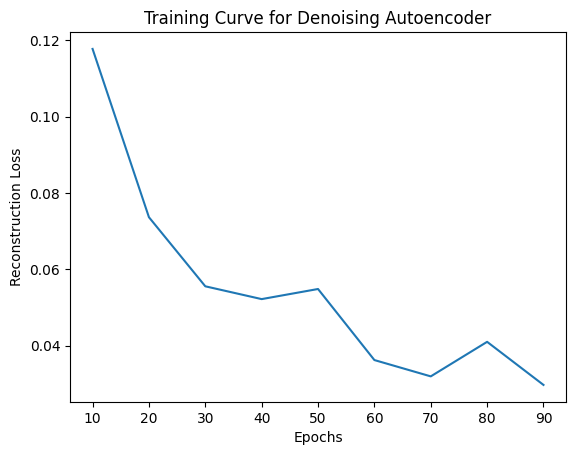

In [6]:
# the training curve for the denoising autoencoder

err_list = []
for epochs in range(10, 100, 10):
    autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

err = pd.Series(err_list, index=range(10, 100, 10))
plt.plot(err)
plt.title('Training Curve for Denoising Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.xticks(range(10, 100, 10))
plt.show()

### (c) Faces

This part plot the reconstructed faces by three different encoder: PCA, Autoencoder and DenoisingAutoencoder.

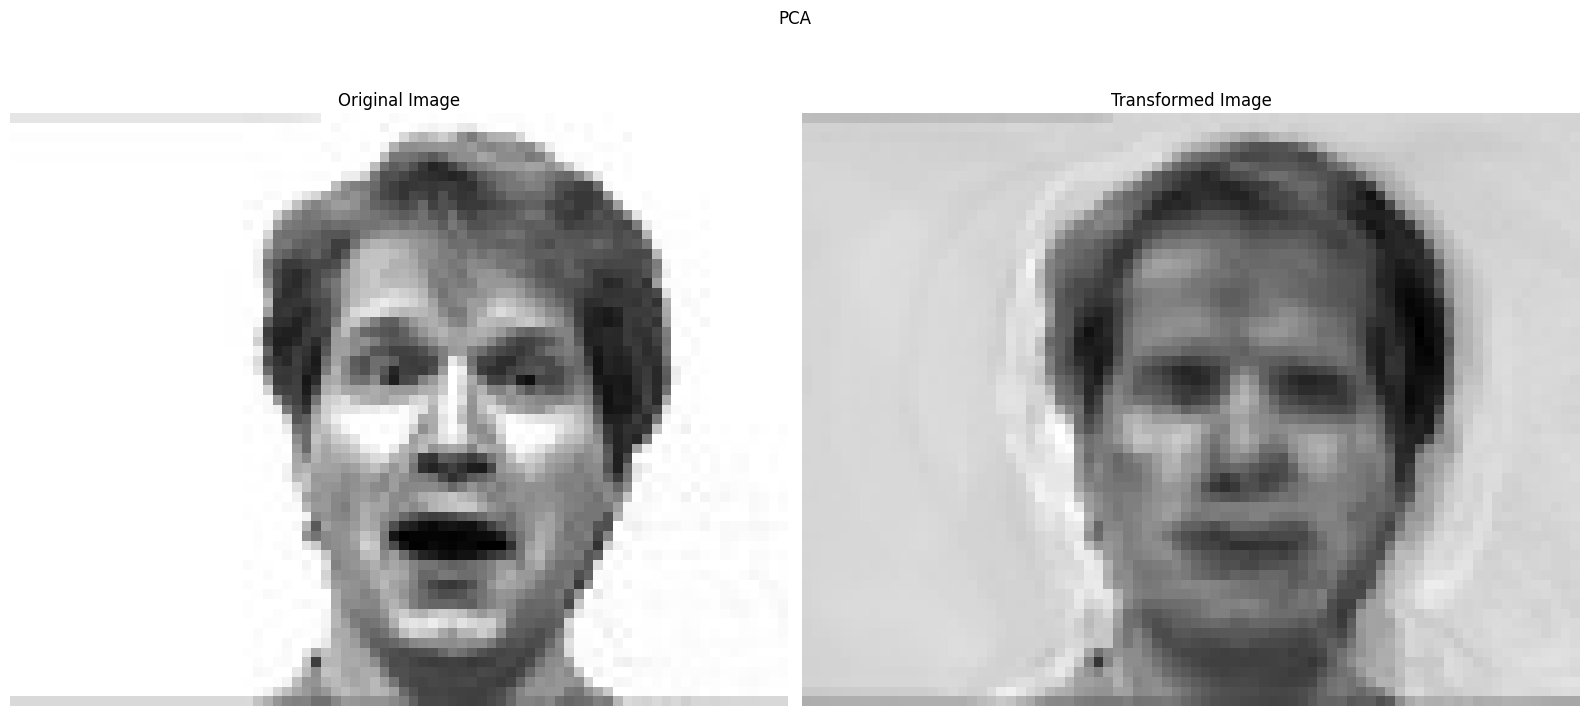

Reconstruction Loss: 0.010710469688056324


In [7]:
# plot original image

img = read_image()


def plot_image(img, model = pca, title = "PCA"):

    img_transformed = model.transform(img)
    img_reconstructed = model.reconstruct(img)

    # plot the original and reconstructed images
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].imshow(np.real(img).reshape(61, 80), cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    axes[1].imshow(np.real(img_reconstructed).reshape(61, 80), cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Transformed Image')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    print(f"Reconstruction Loss: {reconstruction_loss(img, img_reconstructed)}")

plot_image(img, pca)

  0%|          | 0/100 [00:00<?, ?it/s]

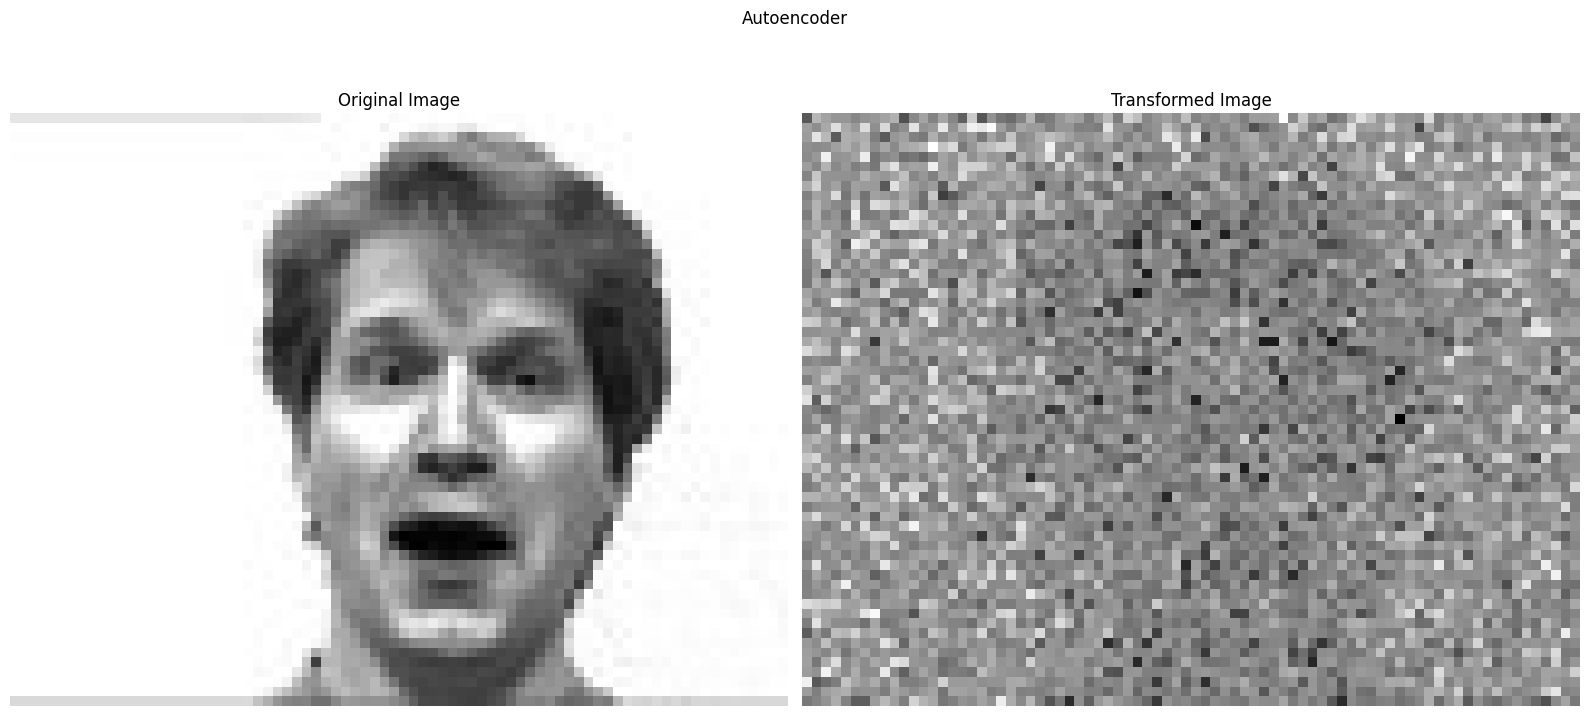

Reconstruction Loss: 0.10303349307408938


In [73]:
# train autoencoder

encoder = Autoencoder(input_dim=4880, encoding_dim=488)
encoder.fit(X_train, epochs=100, batch_size=32)
plot_image(img, encoder, title = "Autoencoder")

  0%|          | 0/100 [00:00<?, ?it/s]

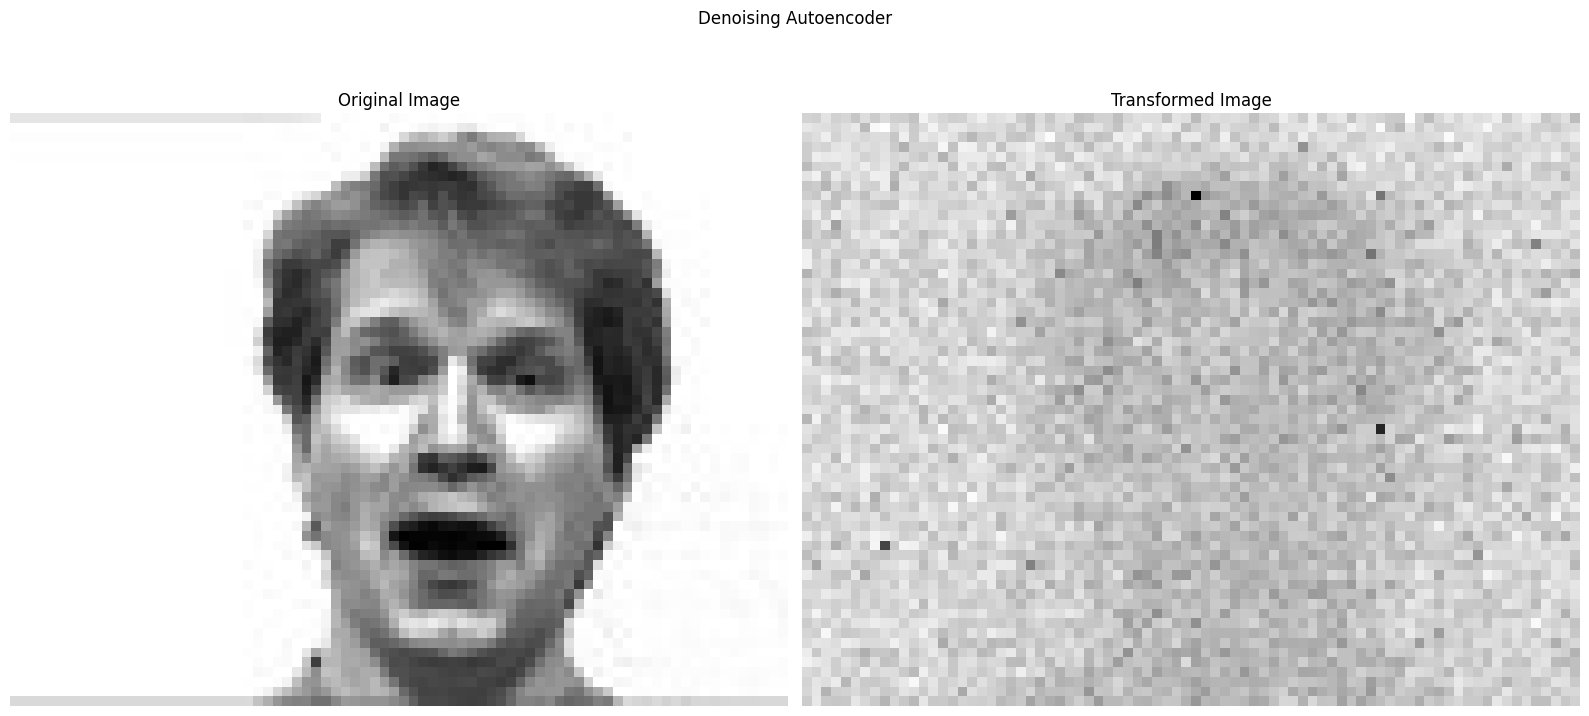

Reconstruction Loss: 0.07361398801586323


In [72]:
encoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
encoder.fit(X_train, epochs=100, batch_size=32)
plot_image(img, encoder, title = "Denoising Autoencoder")

### (d) Compare model architectures

We try two model architectures: The first one is the default architecture provided with the sample code, and the second one are linear architecture with one layer of linear encoder and one layer of linear decoder. 

As see in the training curve, as number of epochs increases, the default (sequential) model converges much faster then the linear model. However, as epochs approach 100, the reconstruction error surpasses that of default model.

We also plot the reconstructed image for the face vector using the same parameter as the one plotted above. We can see that the linear model can reconstruct a much clearer image than the default model.

In [ ]:
# (d) compare two archetecture:

# sequential architecture
err_list_sequential = []
for epochs in range(10, 100, 10):
    autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488, architecture="sequential")
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list_sequential.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

# linear architecture

err_list_linear = []
for epochs in range(10, 100, 10):
    autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488, architecture="linear")
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list_linear.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

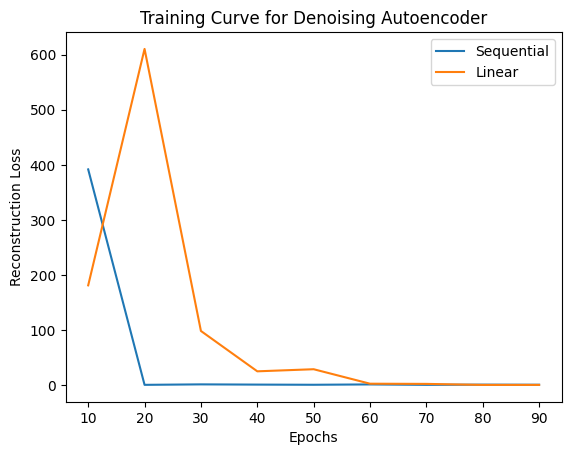

In [55]:
err = pd.DataFrame({"Sequential": err_list_sequential, "Linear": err_list_linear}, index=range(10, 100, 10))
plt.plot(err)
plt.title('Training Curve for Denoising Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.xticks(range(10, 100, 10))
plt.legend(["Sequential", "Linear"])
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

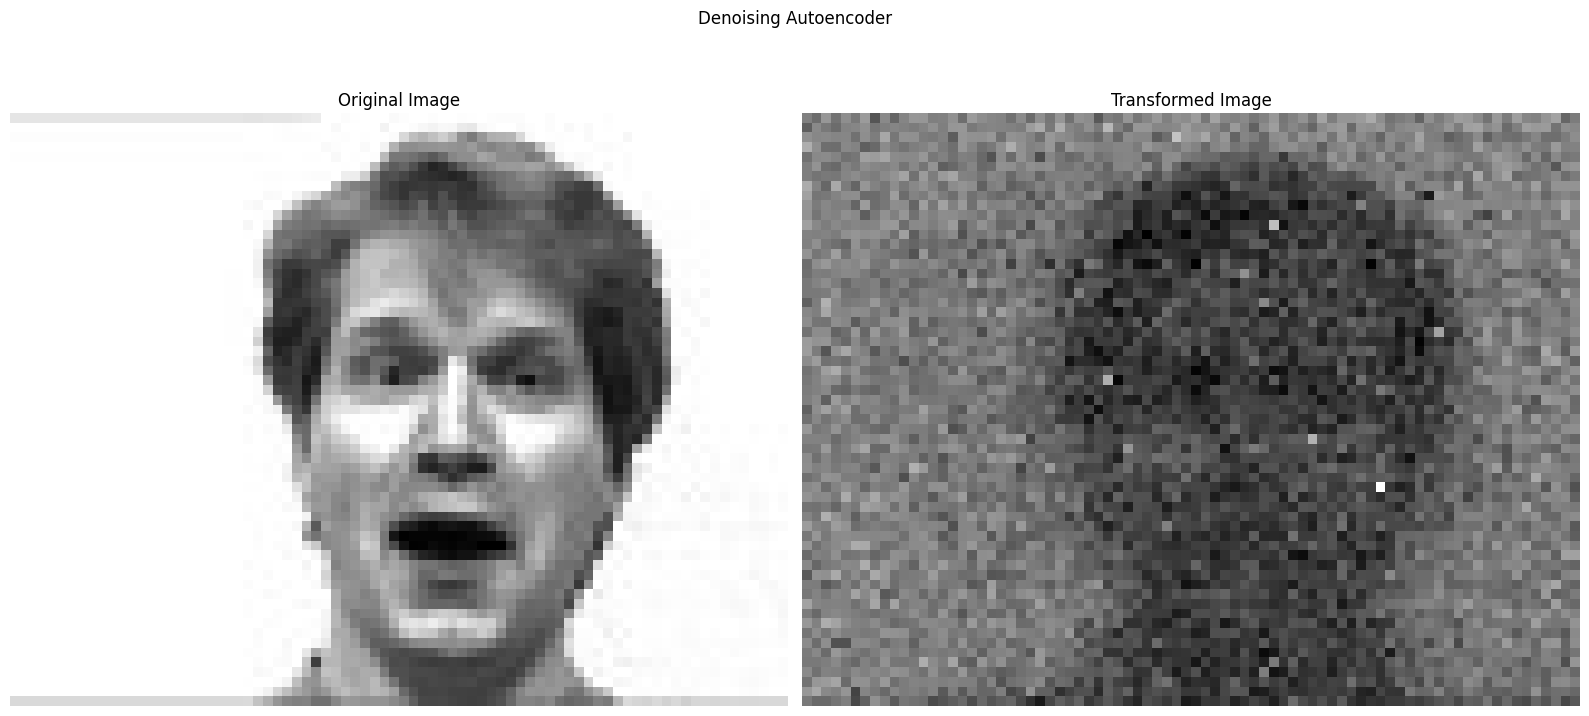

Reconstruction Loss: 0.054513760697187066


In [74]:
autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488, architecture="linear")
autoencoder.fit(X_train, epochs=100, batch_size=32)
plot_image(img, autoencoder, title = "Denoising Autoencoder")

### (e) Optimizer Setting

Useing the same model architecture (default), we test two differnt optimizer: Adam and SGD. The below code plot the learning curve. The learning rates are both set to lr = 0.01

We can see that the Adam optimizer overall has about the same reconstruction loss as SGD. As shown in below output, as epochs grow, the reconstruction error sees no improvement for SGD, but improve significantly for Adam. Thus we conclude that SGD converges much faster then Adam.

In [45]:
# (e) compare two optimizer:

# Adam
err_list_adam = []
for epochs in range(10, 100, 10):
    autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list_adam.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

In [46]:
# SGD
err_list_sgd = []

for epochs in range(10, 100, 10):
    autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488, optimizer_setting="SGD")
    autoencoder.fit(X_train, epochs=epochs, batch_size=135)
    err_list_sgd.append(reconstruction_loss(X_train, autoencoder.reconstruct(X_train)))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

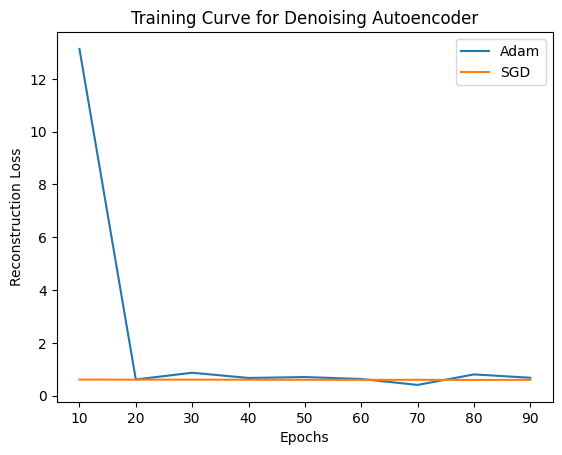

In [48]:
err = pd.DataFrame({"Adam": err_list_adam, "SGD": err_list_sgd}, index=range(10, 100, 10))
plt.plot(err)
plt.title('Training Curve for Denoising Autoencoder')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss')
plt.xticks(range(10, 100, 10))
plt.legend(["Adam", "SGD"])
plt.show()